In [11]:
import pandas as pd
import matplotlib.pyplot as plt

class Colors:
    C21 = "#00ADD8"
    C22 = "#339933"

bench21 = pd.read_csv("results/PC_s10k_n30/bench_21.csv", header=0)
bench22 = pd.read_csv("results/PC_s10k_n30/bench_22.csv", header=0)

def stats(metric, name):
    b21 = bench21.groupby("metric").get_group(
        metric).filter(items=["name", "avg", "sd"]).groupby(
            "name").get_group(name).values[0]
    b22 = bench22.groupby("metric").get_group(
        metric).filter(items=["name", "avg", "sd"]).groupby(
            "name").get_group(name).values[0]
    return ((b21[1], b21[2]), (b22[1], b22[2]))

def plot(stat, names):
    fig, axes = plt.subplots(ncols=len(names), figsize=(3 * len(names), 5), )
    for i in range(len(names)):
        name = names[i]
        (b21, b22) = stats(stat, name)
        axes[i].bar((f"{name} 21", f"{name} 22"), (b21[0], b22[0]), yerr=(b21[1], b22[1]), error_kw=dict(
            capsize=5, alpha=0.7), color=(Colors.C21, Colors.C22))
    fig.tight_layout()
    plt.show()

## Nanoseconds per Operation

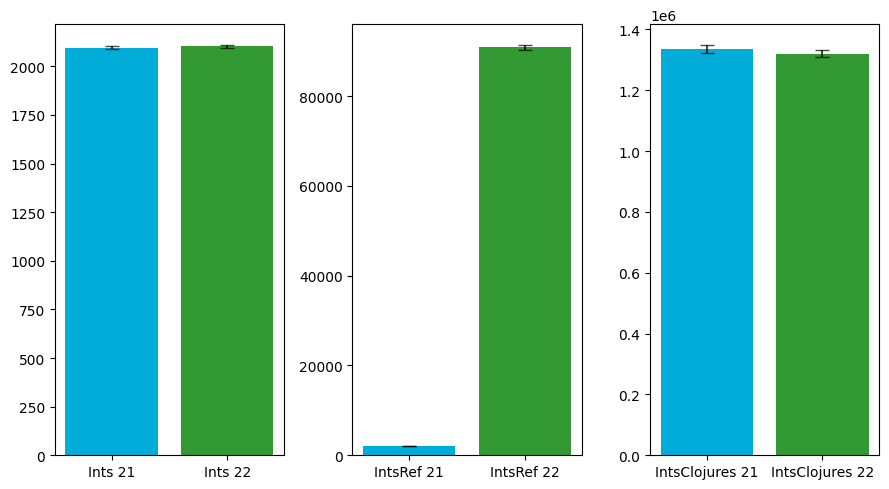

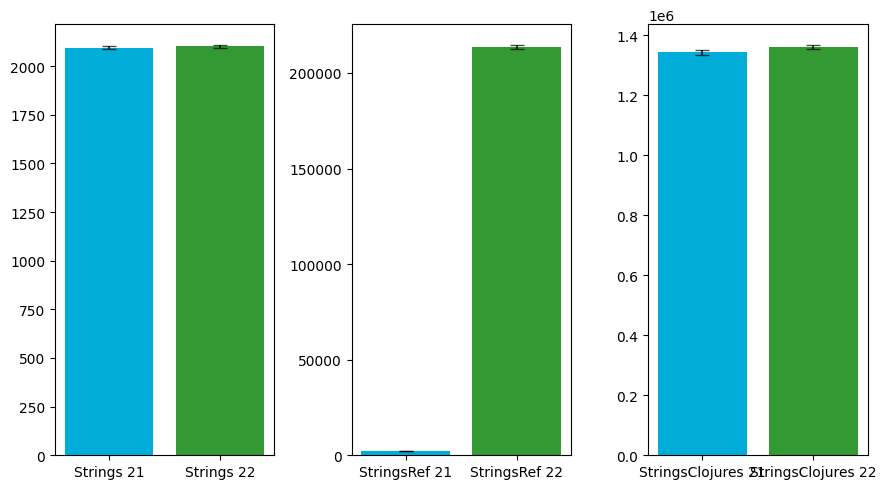

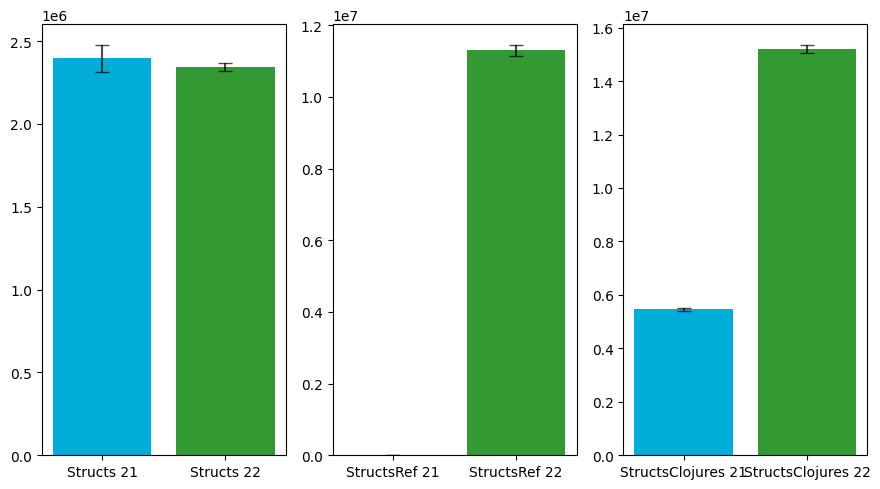

In [12]:
plot("ns/op", ["Ints", "IntsRef", "IntsClojures"])
plot("ns/op", ["Strings", "StringsRef", "StringsClojures"])
plot("ns/op", ["Structs", "StructsRef", "StructsClojures"])

## Allocations per Operation

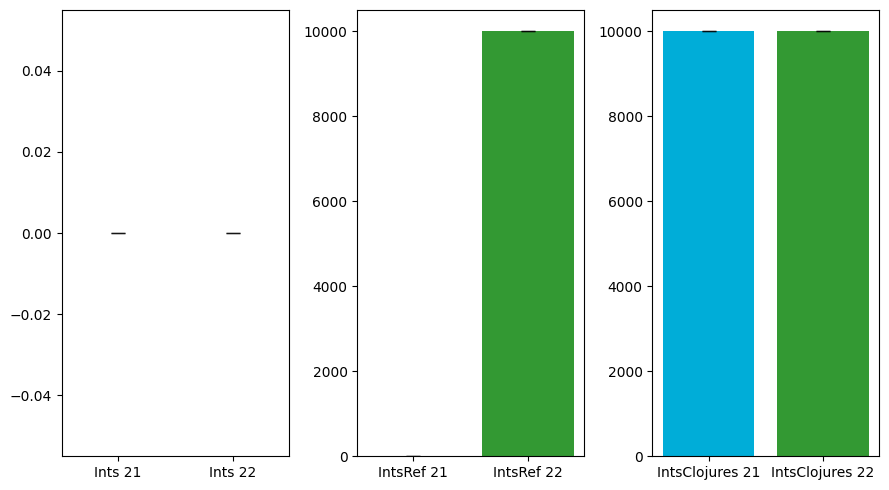

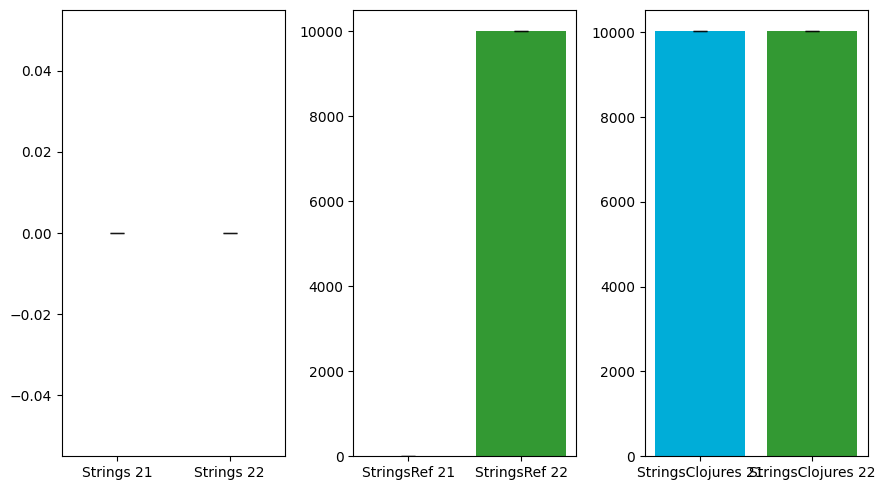

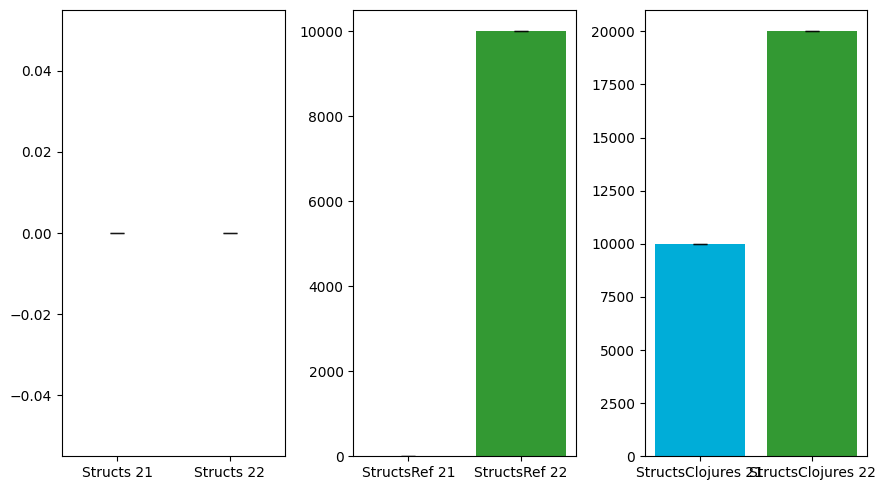

In [13]:
plot("allocs/op", ["Ints", "IntsRef", "IntsClojures"])
plot("allocs/op", ["Strings", "StringsRef", "StringsClojures"])
plot("allocs/op", ["Structs", "StructsRef", "StructsClojures"])

## Bytes per Operation

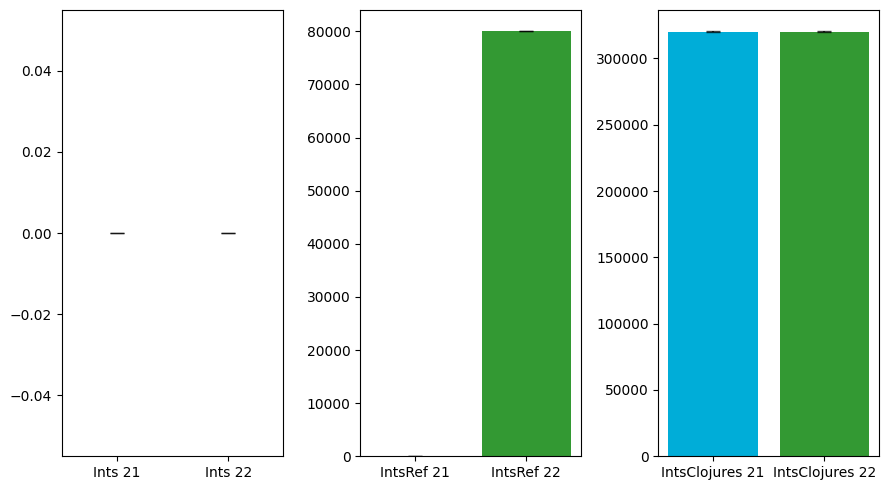

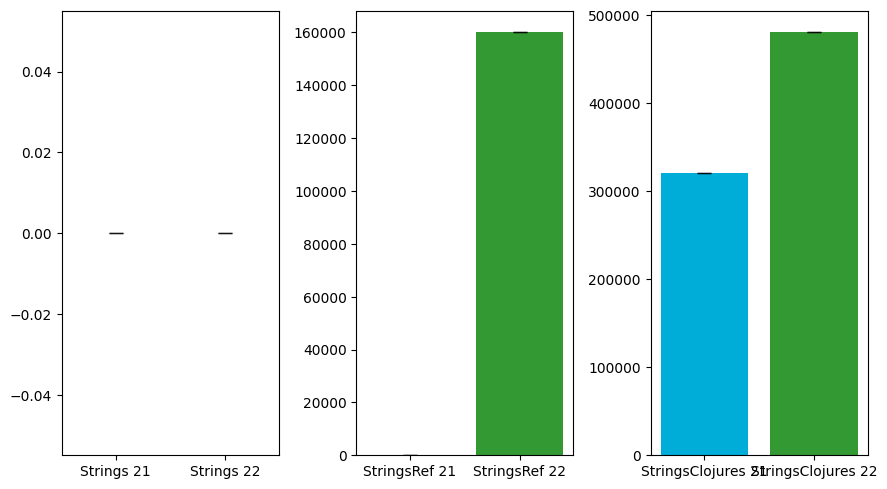

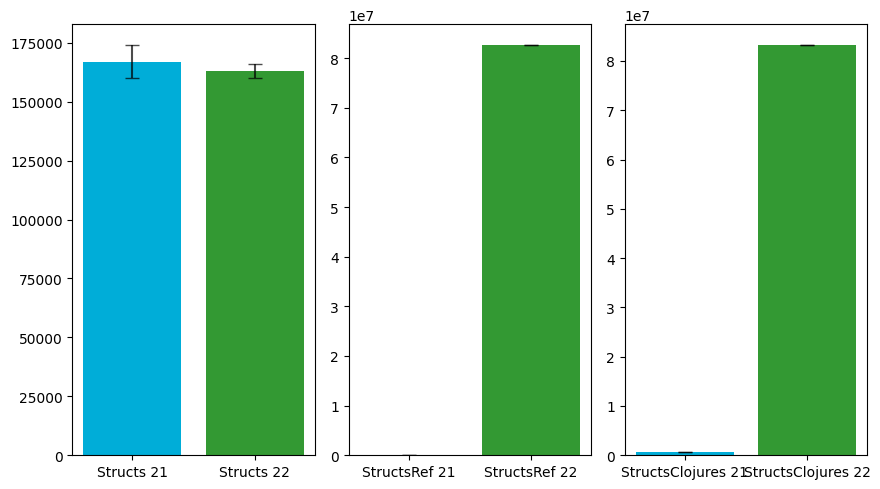

In [14]:
plot("B/op", ["Ints", "IntsRef", "IntsClojures"])
plot("B/op", ["Strings", "StringsRef", "StringsClojures"])
plot("B/op", ["Structs", "StructsRef", "StructsClojures"])